# Price paid yearly

In [1]:
import pandas as pd

In [2]:
# !wget -P data http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015.csv

--2025-02-19 12:47:26--  http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015.csv
Resolving prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.218.85.108, 52.218.120.92, 52.218.24.61, ...
Connecting to prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)|52.218.85.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015.csv [following]
--2025-02-19 12:47:26--  http://prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015.csv
Resolving prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.218.98.116, 52.92.0.28, 52.218.122.11

In [2]:
df = pd.read_csv("./data/pp-2015.csv")
df.head()

,{25EA59FA-4331-4D50-E050-A8C0630562D0},130000,2015-10-23 00:00,NE29 0RX,T,N,F,77,Unnamed: 8,TUDOR AVENUE,Unnamed: 10,NORTH SHIELDS,NORTH TYNESIDE,TYNE AND WEAR,A,A.1
0,{25EA59FA-4332-4D50-E050-A8C0630562D0},97500,2015-11-03 00:00,SR4 0AX,T,N,F,13,NaN,FORDHAM ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{25EA59FA-4333-4D50-E050-A8C0630562D0},95000,2015-10-30 00:00,NE2 4DE,F,N,L,10A,NaN,VICTORIA SQUARE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
2,{25EA59FA-4334-4D50-E050-A8C0630562D0},115000,2015-10-12 00:00,NE40 3HA,T,N,L,41,NaN,SILVERMERE DRIVE,NaN,RYTON,GATESHEAD,TYNE AND WEAR,A,A
3,{25EA59FA-4335-4D50-E050-A8C0630562D0},85000,2015-10-20 00:00,SR4 0ES,S,N,F,17,NaN,PRESCOT ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
4,{25EA59FA-4336-4D50-E050-A8C0630562D0},185000,2015-09-25 00:00,NE12 6SZ,S,N,F,40,NaN,CRUMSTONE COURT,NaN,NEWCASTLE UPON TYNE,NORTH TYNESIDE,TYNE AND WEAR,A,A


In [3]:
header = ["transaction_uid", "price", "date_of_transfer", "postcode", "property_type", "is_new_build", 
          "tenure_duration", "paon", "saon", "street","locality", "town_city", "district", "county", "transaction_type", "record_status"]

df = pd.read_csv("./data/pp-2015.csv", names=header)
df.head()

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status
0,{25EA59FA-4331-4D50-E050-A8C0630562D0},130000,2015-10-23 00:00,NE29 0RX,T,N,F,77,NaN,TUDOR AVENUE,NaN,NORTH SHIELDS,NORTH TYNESIDE,TYNE AND WEAR,A,A
1,{25EA59FA-4332-4D50-E050-A8C0630562D0},97500,2015-11-03 00:00,SR4 0AX,T,N,F,13,NaN,FORDHAM ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{25EA59FA-4333-4D50-E050-A8C0630562D0},95000,2015-10-30 00:00,NE2 4DE,F,N,L,10A,NaN,VICTORIA SQUARE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
3,{25EA59FA-4334-4D50-E050-A8C0630562D0},115000,2015-10-12 00:00,NE40 3HA,T,N,L,41,NaN,SILVERMERE DRIVE,NaN,RYTON,GATESHEAD,TYNE AND WEAR,A,A
4,{25EA59FA-4335-4D50-E050-A8C0630562D0},85000,2015-10-20 00:00,SR4 0ES,S,N,F,17,NaN,PRESCOT ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A


### 1. Do the yearly data files have dates of transfer outwith the year?

We know from looking at the monthly price paid data that date of transfer is not necessarily within the last month because new data can refer to any property transaction. It looks like the yearly data however is "clean" and limited to transfer dates from within that year.

In [7]:
df["date_of_transfer"] = pd.to_datetime(df["date_of_transfer"])
df["date_of_transfer"].describe()

count                          1010708
mean     2015-07-16 01:57:42.569209344
min                2015-01-01 00:00:00
25%                2015-04-24 00:00:00
50%                2015-07-22 00:00:00
75%                2015-10-12 00:00:00
max                2015-12-31 00:00:00
Name: date_of_transfer, dtype: object

### 2. Grouping by month

It looks like there are more transactions in the later half of 2015 with a peak in July.


In [32]:
df_month_count = df.groupby(by=[df["date_of_transfer"].dt.month_name(), df["date_of_transfer"].dt.month])["transaction_uid"].count().to_frame()
df_month_count.index.names = ['month_name', 'month_number']
df_month_count = df_month_count.reset_index().sort_values(by="month_number")[["month_name","transaction_uid"]]

df_month_count

,month_name,transaction_uid
4,January,62451
3,February,63840
7,March,74407
0,April,70566
8,May,80406
6,June,92856
5,July,100039
1,August,91221
11,September,90053
10,October,99184


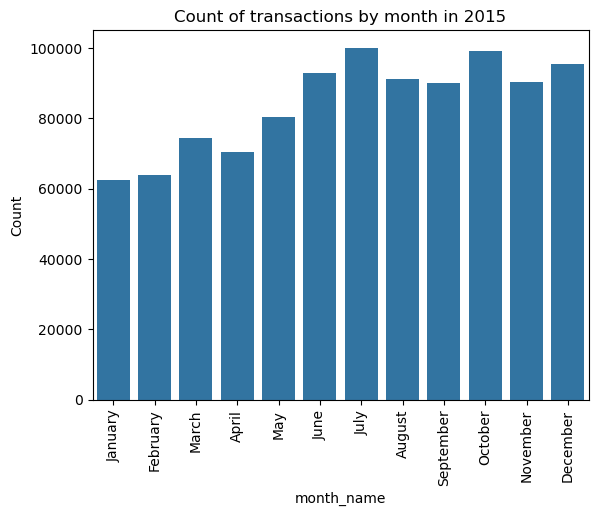

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df_month_count, x="month_name", y="transaction_uid")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Count of transactions by month in 2015") 
plt.show()

### 3. Do the yearly files have the same record status?

In [4]:
df["record_status"].value_counts()

record_status
A    1010708
Name: count, dtype: int64